In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras import models
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from itertools import cycle
import warnings
warnings.filterwarnings("ignore")

In [2]:
(train_image,train_label),(test_image,test_label)=datasets.cifar10.load_data()

In [3]:
print("Train Image Shape is {}\nTest Image Shape is {}".format(train_image.shape,test_image.shape))

Train Image Shape is (50000, 32, 32, 3)
Test Image Shape is (10000, 32, 32, 3)


In [4]:
type(train_image)

numpy.ndarray

In [5]:
print("Train Label Shape is {}\nTest Label Shape is {}".format(train_label.shape,test_label.shape))

Train Label Shape is (50000, 1)
Test Label Shape is (10000, 1)


In [6]:
label_name=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
number_class= len(np.unique(test_label))
print(number_class)

10


In [8]:
target_names =np.array(label_name)

In [9]:
target_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

# Visualize Images From Train Data

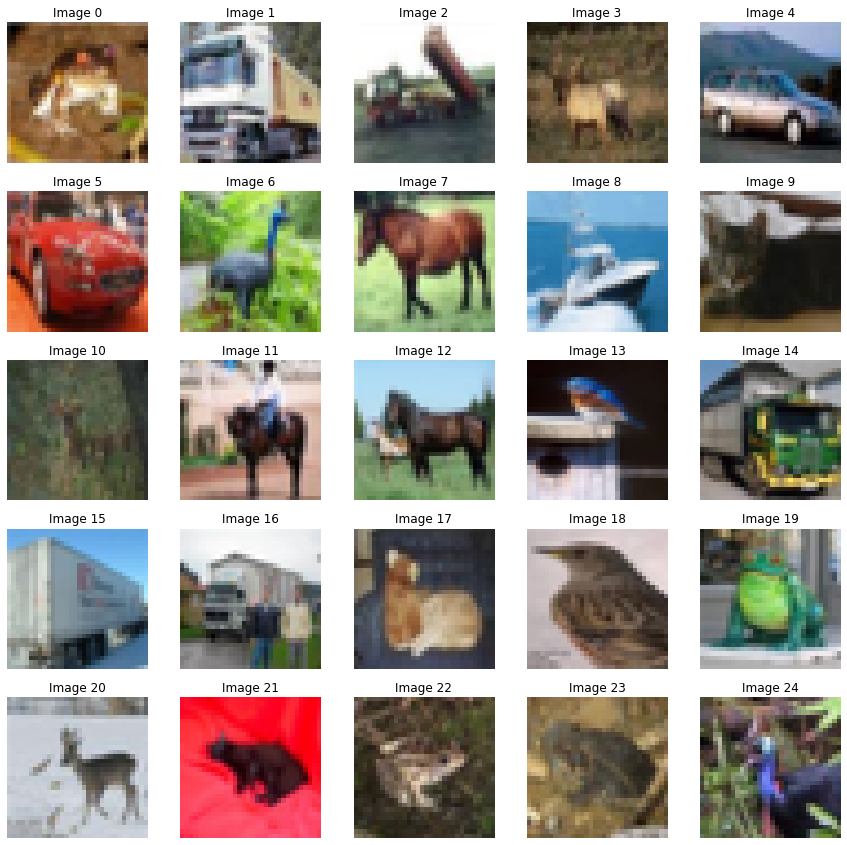

In [10]:
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(train_image[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

# Count Train Label

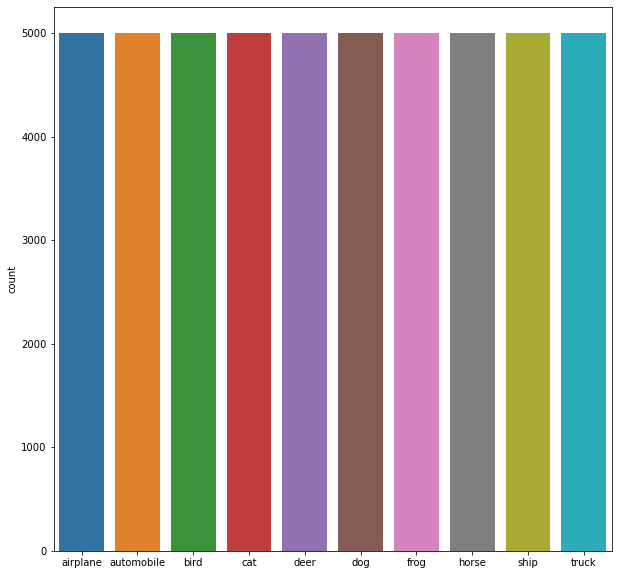

In [11]:
plt.figure(figsize=(10,10))
count_plot=sns.countplot(train_label.flatten())
count_plot.set(xticklabels=label_name)
plt.show()

# Visualize Images From Test Data

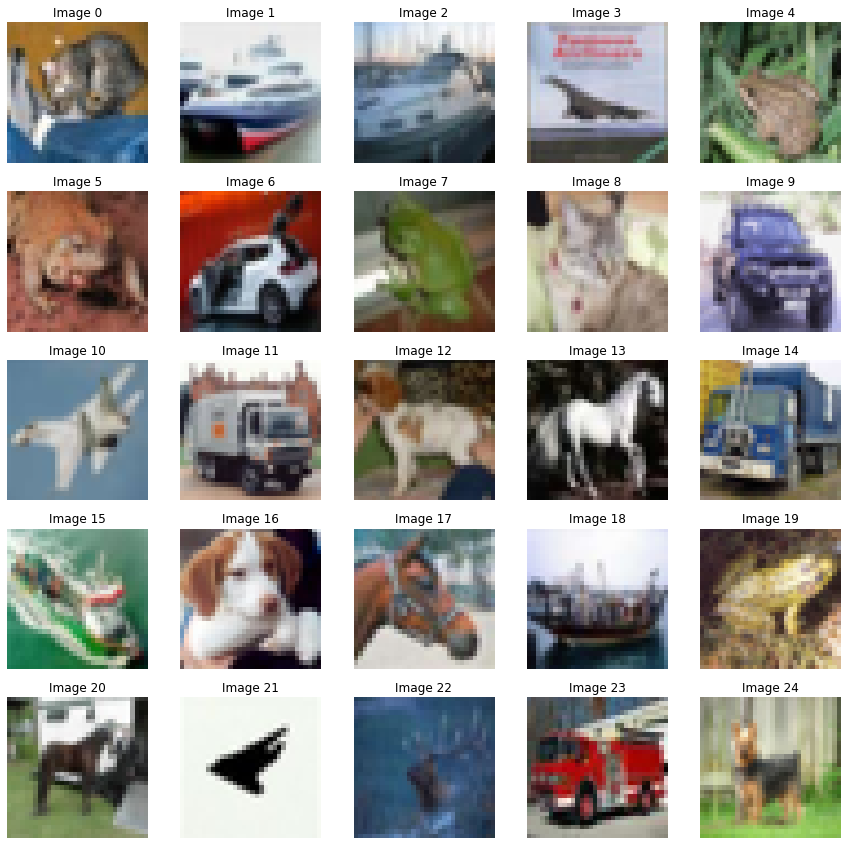

In [12]:
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(test_image[i]) 
    plt.title("Image %s" % i)
    plt.axis('off')

plt.show()

# Count Test Label

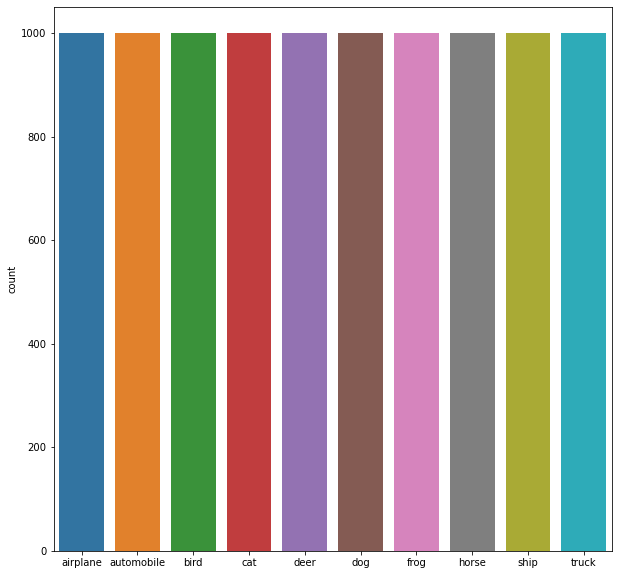

In [13]:
plt.figure(figsize=(10,10))
count_plot=sns.countplot(test_label.flatten())
count_plot.set(xticklabels=label_name)
plt.show()

In [14]:
train_image[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
train_image[0].max()

255

In [16]:
train_image[0].min()

0

# Let's display the first 25 images from the training set and display the class name below each image

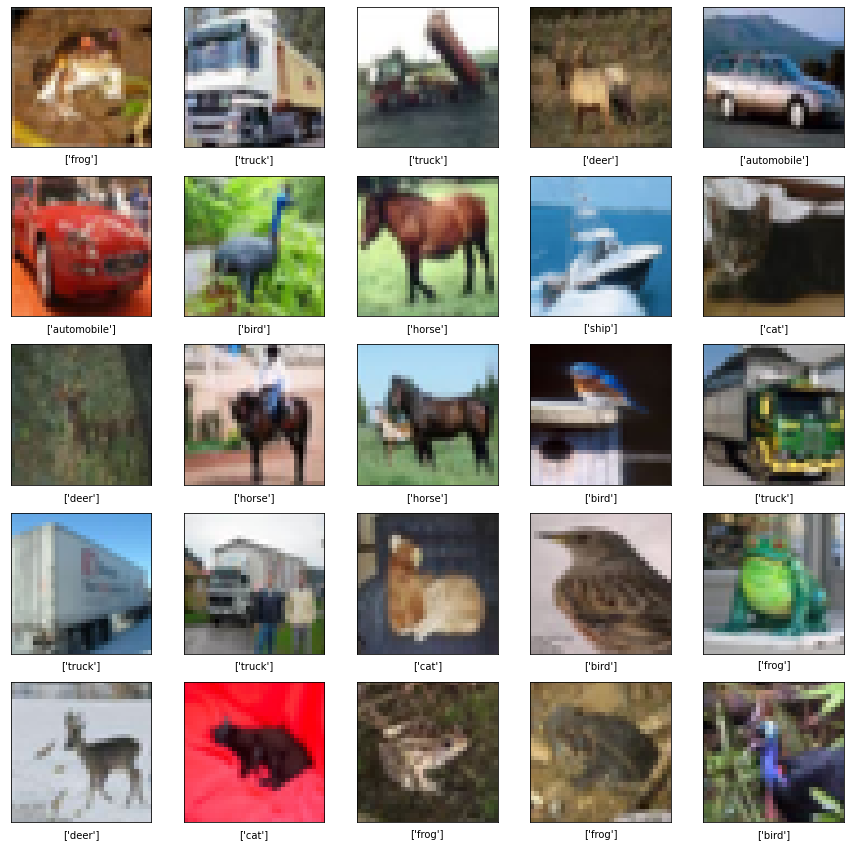

In [17]:
label_name_2=np.array(label_name)
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(label_name_2[train_label[i]])
plt.show()

# Convolutional Neural Network

In [18]:
model=models.Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(32,32,3),padding="same",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(MaxPooling2D((2,2),padding="same"))

model.add(Conv2D(128,(3,3),activation="relu",input_shape=(32,32,3),padding="same",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(MaxPooling2D((2,2),padding="same"))

model.add(Conv2D(256,(3,3),activation="relu",input_shape=(32,32,3),padding="same",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(MaxPooling2D((2,2),padding="same"))

model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

2023-02-01 22:48:37.377796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 22:48:37.378696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 22:48:37.386597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 22:48:37.387349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 22:48:37.388074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0

In [20]:
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=40,verbose = 1,min_delta=0.001)

In [21]:
history=model.fit(train_image,train_label,validation_data=(test_image,test_label),epochs=40,batch_size=64,callbacks=[reduce_lr])

2023-02-01 22:48:40.742270: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2023-02-01 22:48:42.280507: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


782/782 [==============================] - 9s 8ms/step - loss: 2.5361 - accuracy: 0.3495 - val_loss: 2.6920 - val_accuracy: 0.2862
Epoch 2/40
782/782 [==============================] - 6s 7ms/step - loss: 1.5941 - accuracy: 0.5161 - val_loss: 1.5167 - val_accuracy: 0.5211
Epoch 3/40
782/782 [==============================] - 5s 7ms/step - loss: 1.3900 - accuracy: 0.5799 - val_loss: 1.5214 - val_accuracy: 0.5457
Epoch 4/40
782/782 [==============================] - 6s 7ms/step - loss: 1.2932 - accuracy: 0.6182 - val_loss: 1.4949 - val_accuracy: 0.5711
Epoch 5/40
782/782 [==============================] - 6s 8ms/step - loss: 1.2392 - accuracy: 0.6404 - val_loss: 1.2835 - val_accuracy: 0.6250
Epoch 6/40
782/782 [==============================] - 6s 7ms/step - loss: 1.1829 - accuracy: 0.6609 - val_loss: 1.3630 - val_accuracy: 0.6122
Epoch 7/40
782/782 [==============================] - 5s 7ms/step - loss: 1.1568 - accuracy: 0.6713 - val_loss: 1.4082 - val_accuracy: 0.6079
Epoch 8/40
782/78

In [22]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="v",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="v",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="H",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="P",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

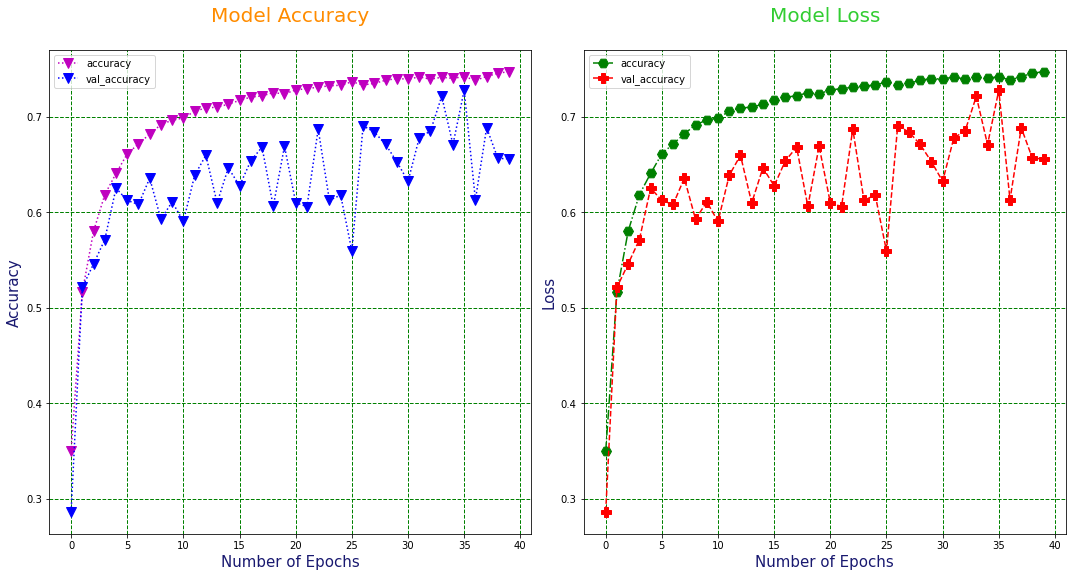

In [23]:
model_loss_and_accuracy(history)

In [24]:
model.evaluate(test_image,test_label,verbose=2)

313/313 - 1s - loss: 1.2476 - accuracy: 0.6558


[1.2475680112838745, 0.6557999849319458]

In [25]:
pred=model.predict(test_image)

In [26]:
final_predict=np.argmax(pred,axis=1)

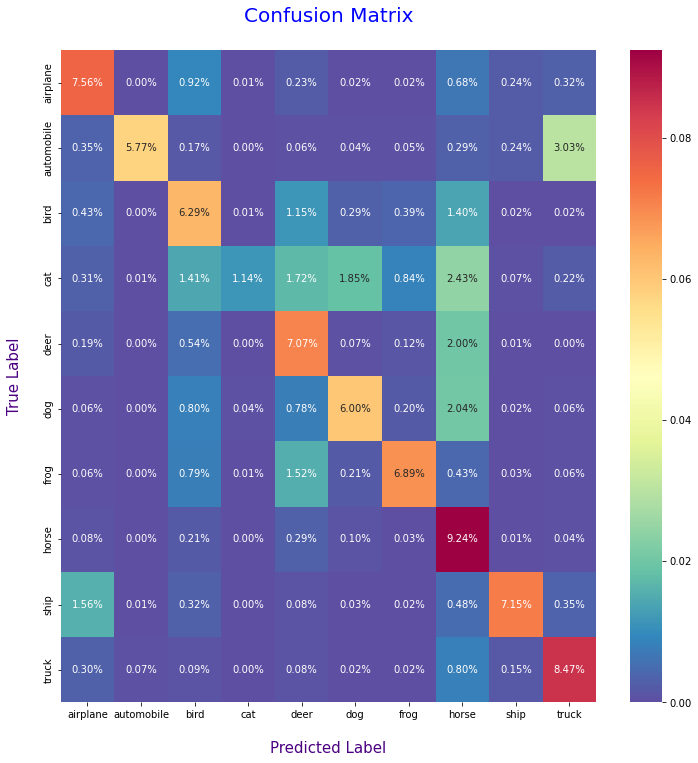

In [27]:
plt.figure(figsize=(12,12))
cf_matrix=confusion_matrix(test_label,final_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Spectral_r',xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",fontsize=20,color="blue")
plt.xlabel("\nPredicted Label",color="indigo",fontsize=15)
plt.ylabel("True Label\n",color="indigo",fontsize=15)
plt.show()

In [28]:
print(classification_report(test_label,final_predict,target_names=label_name))

              precision    recall  f1-score   support

    airplane       0.69      0.76      0.72      1000
  automobile       0.98      0.58      0.73      1000
        bird       0.55      0.63      0.58      1000
         cat       0.94      0.11      0.20      1000
        deer       0.54      0.71      0.62      1000
         dog       0.70      0.60      0.64      1000
        frog       0.80      0.69      0.74      1000
       horse       0.47      0.92      0.62      1000
        ship       0.90      0.71      0.80      1000
       truck       0.67      0.85      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.72      0.66      0.64     10000
weighted avg       0.72      0.66      0.64     10000



# receiver operating characteristic curve

* ## One-vs-Rest multiclass ROC

* ## The One-vs-the-Rest (OvR) multiclass strategy, also known as one-vs-all, consists in computing a ROC curve per each of the n_classes. 
* ## In each step, a given class is regarded as the positive class and the remaining classes are regarded as the negative class as a bulk.
* ## In this section we use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion. 
* ## This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes)

In [29]:
label_binarizer = LabelBinarizer().fit(train_label)
transform_label = label_binarizer.transform(test_label)
transform_label.shape

(10000, 10)

# We can as well easily check the encoding of a specific class

In [30]:
label_binarizer.transform([5])

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [31]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

5

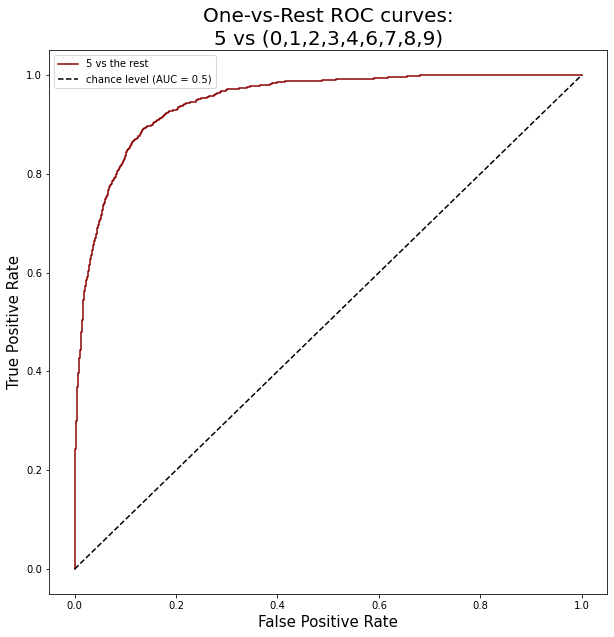

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
fpr, tpr, _ = roc_curve(transform_label[:, class_id], pred[:, class_id])
ax.plot(fpr, tpr, color='darkred', label=f"{class_of_interest} vs the rest")
ax.plot([0, 1], [0, 1], 'k--',label="chance level (AUC = 0.5)")
ax.set_xlabel('False Positive Rate',fontsize=15,color="black")
ax.set_ylabel('True Positive Rate',fontsize=15,color="black")
ax.set_title('One-vs-Rest ROC curves:\n5 vs (0,1,2,3,4,6,7,8,9)',fontsize=20,color="black")
ax.legend()
plt.show()




# ROC curve using micro-averaged OvR
## We can briefly demo the effect of np.ravel:

In [33]:
print(f"Pred Result :\n{pred[0:2,:]}")



Pred Result :
[[9.03449580e-02 5.28162299e-03 1.84178110e-02 5.78123569e-01
  2.72903331e-02 1.22013234e-01 7.10089654e-02 1.12337442e-02
  2.78686266e-02 4.84170504e-02]
 [2.33362932e-02 5.66962175e-03 3.98406592e-05 3.32594908e-07
  1.43929100e-07 3.30603740e-08 2.72615722e-07 1.07203086e-07
  9.69650447e-01 1.30291085e-03]]


In [34]:
print(f"Pred.ravel():\n{pred[0:2,:].ravel()}")

Pred.ravel():
[9.03449580e-02 5.28162299e-03 1.84178110e-02 5.78123569e-01
 2.72903331e-02 1.22013234e-01 7.10089654e-02 1.12337442e-02
 2.78686266e-02 4.84170504e-02 2.33362932e-02 5.66962175e-03
 3.98406592e-05 3.32594908e-07 1.43929100e-07 3.30603740e-08
 2.72615722e-07 1.07203086e-07 9.69650447e-01 1.30291085e-03]


# In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging.
* ## In such cases, one can alternatively use a weighted macro-averaging, not demoed here

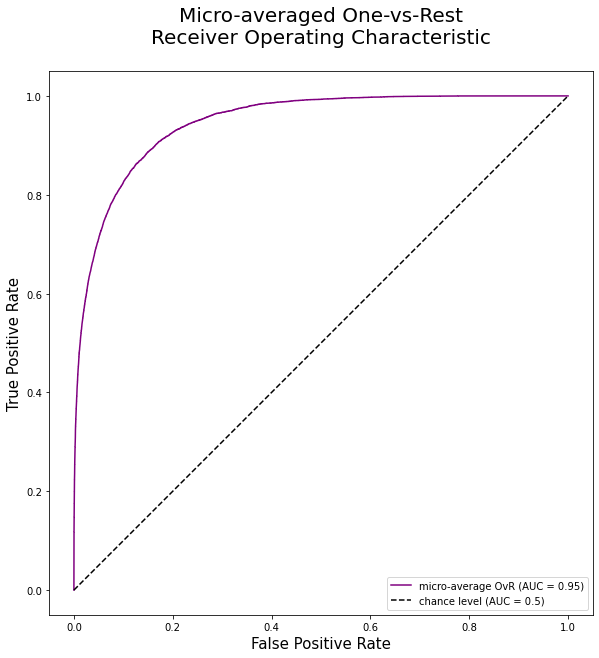

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_predictions(transform_label.ravel(),pred.ravel(),name="micro-average OvR",
                                 color="purple",ax=ax)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate",fontsize=15,color="black")
plt.ylabel("True Positive Rate",fontsize=15,color="black")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic\n",fontsize=20,color="black")
plt.legend()
plt.show()

* # In the case where the main interest is not the plot but the ROC-AUC score itself, we can reproduce the value shown in the plot using roc_auc_score.

In [36]:
micro_roc_auc_ovr = roc_auc_score(test_label,pred,multi_class="ovr",average="weighted")


In [37]:
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.3f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.958


* # This is equivalent to computing the ROC curve with roc_curve and then the area under the curve with auc for the raveled true and predicted classes.

In [38]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(transform_label.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.95


* # ROC curve using the OvR macro-average
* ## Obtaining the macro-average requires computing the metric independently for each class and then taking the average over them, hence treating all classes equally a priori. We first aggregate the true/false positive rates per class:

In [39]:
for i in range(number_class):
    fpr[i], tpr[i], _ = roc_curve(transform_label[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(number_class):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= number_class

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.96


# This computation is equivalent to simply calling

In [40]:
macro_roc_auc_ovr = roc_auc_score(test_label,pred,multi_class="ovr",average="macro")
print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.96


# Plot all One vs Rest ROC Curves Together

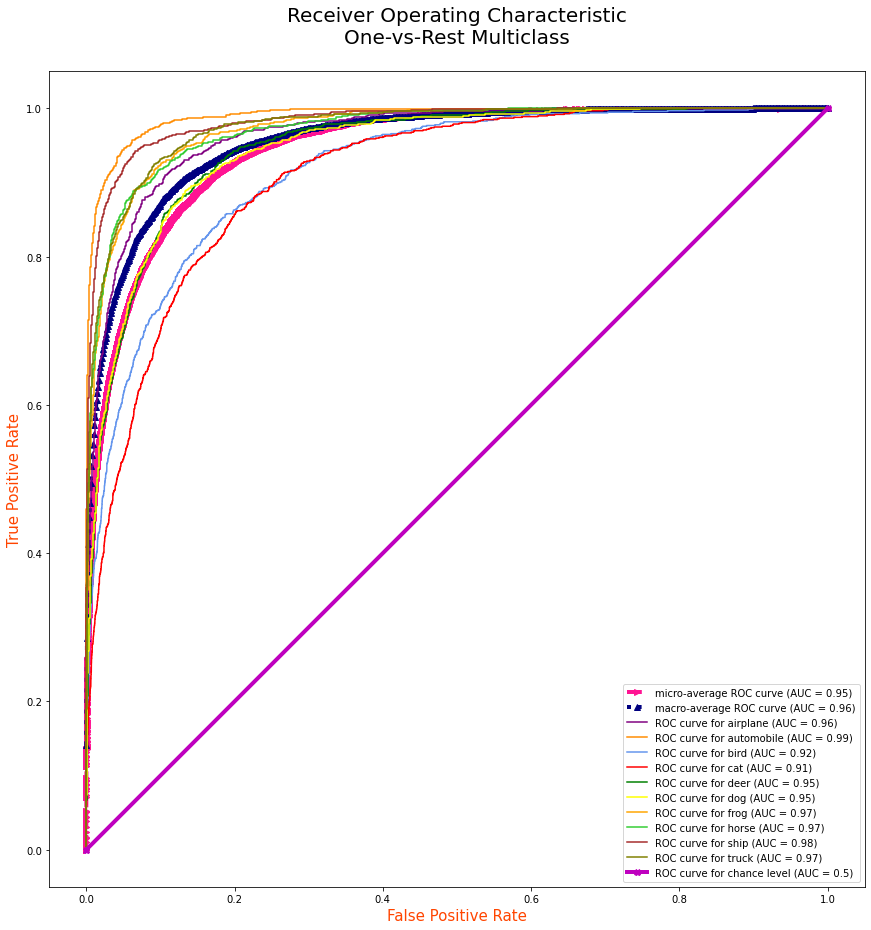

In [41]:
fig, ax = plt.subplots(figsize=(15,15))

plt.plot(fpr["micro"],tpr["micro"],label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",color="deeppink",linestyle="--",marker=">",linewidth=4)
plt.plot(fpr["macro"],tpr["macro"],label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",color="navy",linestyle=":",marker="^",linewidth=4)
colors = cycle(["purple", "darkorange", "cornflowerblue","red","green","yellow","orange","limegreen","brown","olive"])
for class_id, color in zip(range(number_class), colors):
    RocCurveDisplay.from_predictions(transform_label[:, class_id],pred[:, class_id],name=f"ROC curve for {target_names[class_id]}",color=color,ax=ax,)

plt.plot([0, 1], [0, 1], marker="X",linewidth=4,color="m",label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate",color="orangered",fontsize=15)
plt.ylabel("True Positive Rate",color="orangered",fontsize=15)
plt.title("Receiver Operating Characteristic\nOne-vs-Rest Multiclass\n",color="black",fontsize=20)
plt.legend()
plt.show()
